In [27]:
import numpy as np
import pandas as pd
import os
import torch
import torchvision
import torch.nn as nn
import seaborn as sns
from scipy import stats

In [6]:
data_path = os.path.join('dataset', 'studentdata.csv')
data = pd.read_csv(data_path)
data.head()

,Data Year,Data Year (cat),Country,Region,Gender,Age,Age (cat),Handedness,Height,Right foot length,...,Watching TV,Paid work,Housework/Jobs at home,Schoolwork pressure,Planned education level,Favorite music,Superpower,Preferred status,Role model type,Charity donation
0,2013,[2013],USA,SC,Male,0,NaN,Right-Handed,178,27.0,...,8,15,6,Some,Graduate degree,Country,Telepathy,Happy,Relative,Health
1,2015,[2015],USA,IN,Male,0,NaN,Right-Handed,206,37.0,...,8,0,2,Some,Graduate degree,Rock and roll,Invisibility,Famous,Relative,Environment
2,2013,[2013],USA,NC,Female,12,[12],Right-Handed,144,19.5,...,100,0,1,None,Other,Country,Fly,Rich,Relative,Health
3,2015,[2015],USA,VT,Male,15,[15],Right-Handed,183,22.0,...,8,0,14,Some,Some college,Techno/Electronic,Fly,Healthy,Relative,Health
4,2014,[2014],USA,KS,Male,16,[16],Right-Handed,231,30.0,...,6,7,9,Some,Graduate degree,Rap/Hip hop,Invisibility,Rich,Other,Education/Youth development


<AxesSubplot:>

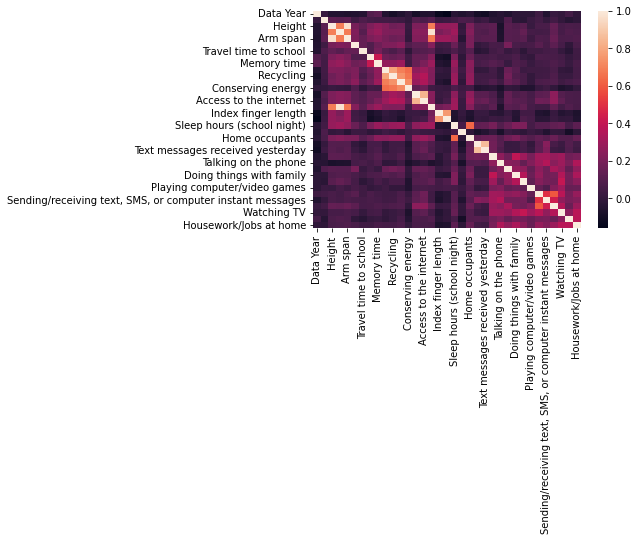

In [17]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Height', ylabel='Arm span'>

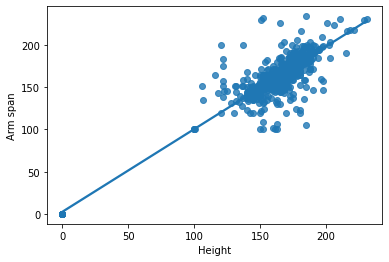

In [19]:
sns.regplot(x='Height', y='Arm span', data=data)

In [30]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Height'],data['Arm span'])

print(f'Slope is {slope}, intercept is {intercept}, r_value is {r_value}, R^2 is {r_value * r_value}, std_err is {std_err}')

Slope is 0.9784217168863787, intercept is 2.5365519000093, r_value is 0.9607310909270771, R^2 is 0.9230042290739316, std_err is 0.008945248368577631


<AxesSubplot:xlabel='Left foot length', ylabel='Height'>

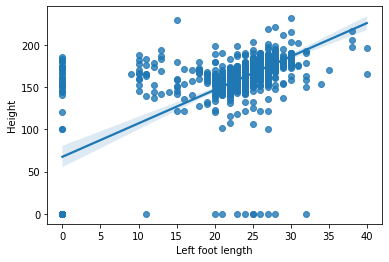

In [26]:
sns.regplot(x='Left foot length', y='Height', data=data)

In [32]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Left foot length'],data['Height'])

print(f'Slope is {slope}, intercept is {intercept}, r_value is {r_value}, R^2 is {r_value * r_value}, std_err is {std_err}')

Slope is 3.948297058249518, intercept is 67.51581145375306, r_value is 0.6843894072098964, R^2 is 0.46838886070111335, std_err is 0.13314912195253037


<AxesSubplot:xlabel='Doing things with family', ylabel='Left foot length'>

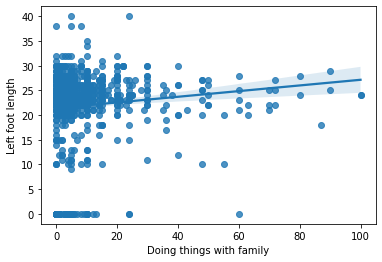

In [35]:
sns.regplot(x='Doing things with family', y='Left foot length', data=data)

In [37]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Doing things with family'],data['Left foot length'])

print(f'Slope is {slope}, intercept is {intercept}, r_value is {r_value}, R^2 is {r_value * r_value}, std_err is {std_err}')

Slope is 0.057308393783844405, intercept is 21.411875441230826, r_value is 0.09702165506595457, R^2 is 0.009413201551737069, std_err is 0.018609322179916194


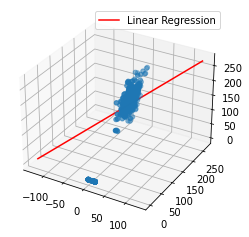

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(data['Age'], data['Height'], data['Arm span'])

X = data[['Age', 'Height', 'Arm span']].values
Xlen = X.shape[0]
avgPointCloud = 1 / Xlen * np.array([np.sum(X[:, 0]), np.sum(X[:, 1]), np.sum(X[:, 2])])
Xmean = X - avgPointCloud

cov = 1 / Xlen * X.T.dot(Xmean)

t = np.arange(-5, 5, 1)
linearReg = avgPointCloud + cov[:, 0] * np.vstack(t)

ax.plot(linearReg[:, 0], linearReg[:, 1], linearReg[:, 2], 'r', label='Linear Regression')

ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Arm Span')

ax.legend()

plt.show()

The equation for a line is $ax + by + c = z$
<br><br>
So...
$$
A = 
\begin{bmatrix}
age_0 & armspan_0 & 1 \\
age_1 & armspan_1 & 1 \\
age_2 & armspan_2 & 1 \\
... \\
age_n & armspan_n & 1
\end{bmatrix}
$$

<br>

$$
B = 
\begin{bmatrix}
height_0 \\ 
height_1 \\
height_2 \\ 
... \\
height_n
\end{bmatrix}
$$

<br><br>

Using the normal equations:

$$
\theta = (X^{T}X)^{-1}*(X^{T}y)
$$

<br><br>

We can plug in $A$ and $B$ into the normal equations to get:

$$
z = (A^{T}A)^{-1}*(A^{T}B) \\
where\ z = \mathbb{R}^{3 \times 1}
$$